# Large Wood Calculations

*Reference: Stream Habitat Restoration Guidelines (SHRG), Anchoring and Placement of Large Wood Appendix, 2012*

***

#### Equations:

The vertical forces are the gravity force (weight of the log), $F_G$, and the buoyant force, $F_B$, calculated as follows:

\begin{equation*}
    F_G = Vol_{wood}\times\gamma_{wood}
\label{eq:force_gravity} \tag{Equation 1}
\end{equation*}

\begin{equation*}
    F_B = Vol_{woodSubmerged}\times\gamma_{water}
\label{eq:force_buoyant} \tag{Equation 2}
\end{equation*}

where:

- $\gamma_{water}$ is the specific weight of water, 62.4 lbs/ft<sup>3</sup> (or pcf)
- $\gamma_{wood}$ is the specific weight of wood, 33 lbs/ft<sup>3</sup> for Douglas Fir
- $Vol_{wood}$ is the total volume of wood and $Vol_{woodSubmerged}$ is the volume of the portion of submerged wood

In the horizontal, the friction force, $F_f$, is defined as:

\begin{equation*}
    F_f = \mu\times F_N
\label{eq:force_friction} \tag{Equation 3}
\end{equation*}

where:

- $\mu$ is a coefficient of friction based on the internal angle of friction (0.4 for sand, 0.9 for gravel)
- $F_N$ is the net weight of the log, acting as the normal force

The dynamic fluid forces, or drag, $F_D$, are the destabilizing forces that are offset by friction. This force is calculated as:

\begin{equation*}
    F_D = \left(\frac{v^2}{2g}\right)\times A_{SW} \times C'_D \times \rho_{w}
\label{eq:force_fluid} \tag{Equation 4}
\end{equation*}

where:

- $v$ is the mean incidental flow velocity
- $\rho_w$ is the density of water
- $g$ is the acceleration due to gravity
- $A_{SW}$ is the area of the submerged wood normal to the incident flow
- $C'_D$ is the drag coefficient and is a function of the object's shape, orientationto flow, grouping and boundary conditions

First, we will load the necessary modules:

In [1]:
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for creating figures
from LWD_calcs import LWD_calcs # for performing LWD calculations

Next, we will define our physical constants. For simplicity in calling functions, parameters will be grouped into structured arrays.

In [2]:
####################################################################################################
####################################################################################################
## CONSTANTS
####################################################################################################
####################################################################################################
# create CONSTANTS structured array, preallocate with zeros
CONST = np.zeros(1, dtype={'names':('g', 'gam_wat', 'gam_wood', 'gam_soil', 'gam_soil_sat',
                                    'gam_bldr', 'C_DU', 'C_DP', 'mu_gravel', 'mu_sand'),
                           'formats':('f8', 'f8', 'f8', 'f8', 'f8',
                                       'f8', 'f8', 'f8', 'f8', 'f8')})
####################################################################################################
# define constant parameters
CONST['g'] = 32.2 # gravitational acceleration (ft/s^2)
CONST['gam_wat'] = 62.4 # unit weight of water (lbf/ft^3)
CONST['gam_wood'] = 33.0 # unit weight of wood, Douglas Fir (lbf/ft^3)
CONST['gam_soil'] = 105.0 # dry unit weight of soil (lbf/ft^3)
CONST['gam_soil_sat'] = 125.0 # wet unit weight of soil (lbf/ft^3)
CONST['gam_bldr'] = 2.65*CONST['gam_wat'] # unit weight of boulder (lbf/ft^3)
CONST['C_DU'] = 1.2 # coefficient of drag, for blunt rootwad facing upstream (per WDFW)
CONST['C_DP'] = 0.4 # coefficient of drag, for log near parallel (per WDFW)
CONST['mu_gravel'] = 0.9 # coefficient of friction for gravel
CONST['mu_sand'] = 0.4 # coefficient of friction for sand
####################################################################################################
####################################################################################################

Next, we will specify the design velocity, defined as a multiple of the average of maximum channel velocity for the design event.

In [3]:
####################################################################################################
####################################################################################################
v_ave = 8 # approximate channel velocity at 100-year event (ft/s)
v_1 = 1.5*v_ave # design velocity (ft/s)
print("design velocity: v_1 = "+str(v_1) + " ft/s")
####################################################################################################
####################################################################################################

design velocity: v_1 = 12.0 ft/s


Now, we will define our large wood component parameters, again using structured arrays.

In [4]:
####################################################################################################
####################################################################################################
## INPUT PARAMETERS
####################################################################################################
####################################################################################################
# create LOG structured array, defining member log components, preallocate with zeros 
LOG = np.zeros(1, dtype={'names':('Diam_in', 'Len_ft', 'Num', 'alpha', 'dep_ft', 'R_embed', 'subm'),
                         'formats':('f8', 'f8', 'i4', 'f8', 'f8', 'f8', 'f8')})
# create BLDR structured array, defining member boulder ballast components, preallocate with zeros 
BLDR = np.zeros(1, dtype={'names':('Diam_in', 'Num', 'subm'),
                          'formats':('f8', 'i4', 'f8')})
# create DEP structured array, defining relevant depths of soil and water, preallocate with zeros 
DEP = np.zeros(1, dtype={'names':('soil', 'water'),
                         'formats':('f8', 'f8')})
# create JAM structured array, defining relevant JAM dimensions [THIS IS UNUSED], preallocate with zeros 
JAM = np.zeros(1, dtype={'names':('len_ft', 'wid_ft', 'dep_ft'),
                         'formats':('f8', 'f8', 'f8')})
####################################################################################################
# define parameters
##
LOG['Diam_in'] = 18 # log member diameter (in)
LOG['Len_ft'] = 12 # log member length (ft)
LOG['Num'] = 1 # number of log members
LOG['alpha'] = 90 # angle to flow of log member (degrees)
LOG['dep_ft'] = 3.0 # depth of jam normal to incident of flow (ft)
LOG['R_embed'] = 0.6 # fraction of log member embedded
LOG['subm'] = 1 # fraction of log member submerged
##
BLDR['Diam_in'] = 35 # boulder ballast diameter (in)
BLDR['Num'] = 0 # number of boulder ballasts
BLDR['subm'] = 0 # # fraction of boulder submerged
##
DEP['soil'] = 3.5 # depth of soil over embedded log member (ft)
DEP['water'] = 6.0 # depth of water for design event (ft)
##
JAM['len_ft'] = 4.0 # length of jam parallel to incident of flow (ft)
JAM['wid_ft'] = 5.0 # width of jam normal to incident of flow (ft)
JAM['dep_ft'] = 3.0 # depth of jam normal to incident of flow (ft)
####################################################################################################
####################################################################################################

We will now define a range of log diameters and log lengths for which to calculate factors of safety. All other parameters are the same as defined above.

In [5]:
####################################################################################################
####################################################################################################
# range of log diameters (in)
Dlogm = np.matrix(np.arange(6,37,0.5))
# range of log lengths (ft)
Llogm = np.transpose(np.matrix(np.arange(5,36,1)))
# create and preallocate LOGm, which will create a matrix of factors of safety
tp = np.dtype([('Diam_in', 'f8', np.shape(Dlogm)), ('Len_ft', 'f8', np.shape(Llogm)),
              ('Num', 'i4'), ('alpha', 'f8'), ('dep_ft', 'f8'), ('R_embed', 'f8'), ('subm','f8')])
LOGm = np.zeros(1, dtype=tp)
# define parameters
LOGm['Diam_in'] = Dlogm
LOGm['Len_ft'] = Llogm
LOGm['Num'] = LOG['Num']
LOGm['alpha'] = LOG['alpha']
LOGm['dep_ft'] = LOG['dep_ft']
LOGm['R_embed'] = LOG['R_embed']
LOGm['subm'] = LOG['subm']
####################################################################################################
####################################################################################################

Now, we will calculate the factors of safety (for uplift and drag) for the ranges of diameter and lengths as well as for the specific values defined in the "Input Parameters" section above.

In [6]:
FS_U_m, FS_D_m = LWD_calcs(12, LOGm, BLDR, DEP, CONST)
FS_U_single, FS_D_single = LWD_calcs(12, LOG, BLDR, DEP, CONST)
print('uplift factor of safety, FS_U = ' + str(round(float(FS_U_single),2)))
print('drag factor of safety, FS_D = ' + str(round(float(FS_D_single),2)))

Gravity force on log: F_G = [0.55] tonf
Buoyant force on log: F_B = [0.49] tonf
Drag force on log: F_D = [0.59] tonf
Friction force on log: F_F = [1.31] tonf
uplift factor of safety, FS_U = 4.0
drag factor of safety, FS_D = 2.22


Finally, we will plot the selected log dimensions over contours of the factor of safety.

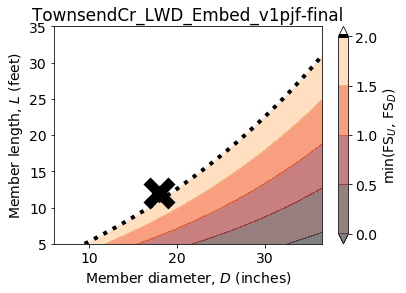

In [8]:
plt.rcParams.update({'font.size': 14})
fig1, ax1 = plt.subplots()
CS1 = plt.contourf(np.tile(Dlogm,[np.size(Llogm), 1]),
            np.tile(Llogm,[1, np.size(Dlogm)]),
            np.minimum(FS_U_m, FS_D_m),
            levels = [0, 0.5, 1, 1.5, 2],
            extend = 'both',
            cmap = plt.cm.gist_heat,
            alpha = 0.5)
CS2 = plt.contour(np.tile(Dlogm,[np.size(Llogm), 1]),
            np.tile(Llogm,[1, np.size(Dlogm)]),
            np.minimum(FS_U_m, FS_D_m),
            levels = [-1000, 2, 1000],
            colors = 'k',
            linestyles = ':',
            linewidths = 4)
plt.plot(LOG['Diam_in'], LOG['Len_ft'], 'xk',
         markersize=25,
         markeredgewidth=10)
cbar = fig1.colorbar(CS1)
cbar.add_lines(CS2)
cbar.ax.set_ylabel('min(FS$_U$, FS$_D$)')
ax1.set_xlabel('Member diameter, $\it{D}$ (inches)')
ax1.set_ylabel('Member length, $\it{L}$ (feet)')
plt.title('TownsendCr_LWD_Embed_v1pjf-final')
plt.show()